## ERDAP with erddapy example for PMEL TELOS platform data

***requires python 3.6*** for passing time information (pandas datetime to timestamp doesn't appear to work in 2.7)

### connecting and basic information

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from erddapy import ERDDAP
import pandas as pd
import numpy as np

import datetime

server_url = 'http://dunkel.pmel.noaa.gov:9290/erddap'

e = ERDDAP(server=server_url)

In [47]:
#df = pd.read_csv(e.get_search_url(response='csv', search_for='all'))
df = pd.read_csv(e.get_search_url(response='csv', search_for='TELOS'))

In [48]:
print('We have {} tabledap, {} griddap, and {} wms endpoints.\n'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
))
print('Datasets:\n{}'.format('\n'.join(df['Title'])))

We have 5 tabledap, 0 griddap, and 0 wms endpoints.

Datasets:
TELOS-1001 atrh170015
TELOS-1001 atrh170016
TELOS-1001 druck170004
TELOS-1001 paros170004
TELOS-1001 wind170013


In [49]:
variable_dic={}

for index,row in df.iterrows():
    info_url = e.get_info_url(dataset_id=row['Dataset ID'], response='csv')
    info = pd.read_csv(info_url)

    #print(info.head())
    print('Variables in {}:'.format(row['Dataset ID']))
    print(','.join(info.loc[info['Row Type'] == 'variable', 'Variable Name']))

    variable_dic.update({row['Dataset ID']:list(info.loc[info['Row Type'] == 'variable', 'Variable Name'])})
    

Variables in atrh170015:
time,AT,AS,RH,RS,longitude,latitude,id
Variables in atrh170016:
time,AT,AS,RH,RS,longitude,latitude,id
Variables in druck170004:
time,BP,BS,longitude,latitude,id
Variables in paros170004:
time,BP,BS,longitude,latitude,id
Variables in wind170013:
time,U,USD,V,VSD,SP,G,C,longitude,latitude,id


In [50]:
variable_dic


{'atrh170015': ['time', 'AT', 'AS', 'RH', 'RS', 'longitude', 'latitude', 'id'],
 'atrh170016': ['time', 'AT', 'AS', 'RH', 'RS', 'longitude', 'latitude', 'id'],
 'druck170004': ['time', 'BP', 'BS', 'longitude', 'latitude', 'id'],
 'paros170004': ['time', 'BP', 'BS', 'longitude', 'latitude', 'id'],
 'wind170013': ['time',
  'U',
  'USD',
  'V',
  'VSD',
  'SP',
  'G',
  'C',
  'longitude',
  'latitude',
  'id']}

In [53]:
constraints = {
    'time>=': '2017-07-10T00:00:00Z',
    'time<=': str(datetime.datetime.today()),
}

### retrieving and plotting data - variables

In [54]:
from requests.exceptions import HTTPError

dfs = {}
for index,row in df.iterrows():
    print(row['Dataset ID'])
    try:
        e = ERDDAP(server=server_url,
            dataset_id=row['Dataset ID'],
            protocol='tabledap',
            response='csv',
            variables=variable_dic[row['Dataset ID']],
            constraints=constraints
        )
    except HTTPError:
        print('Failed to generate url {}'.format(row['Dataset ID']))
        continue
    dfs.update({row['Dataset ID']: e.to_pandas(
                            index_col='time',
                            parse_dates=True,
                            skiprows=(1,)  # units information can be dropped.
                            )})
    

atrh170015
atrh170016
druck170004
paros170004
wind170013


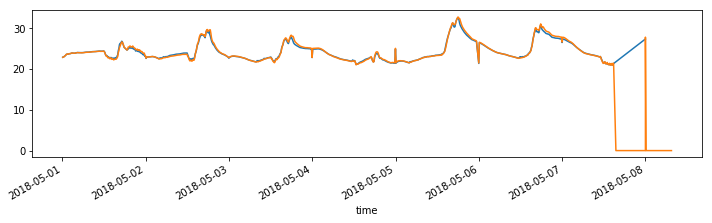

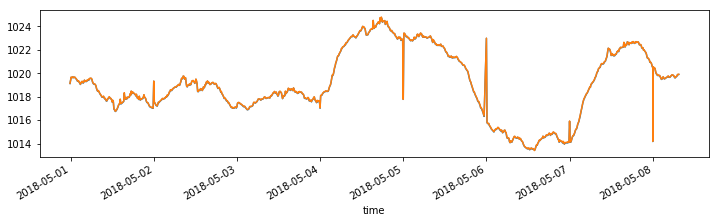

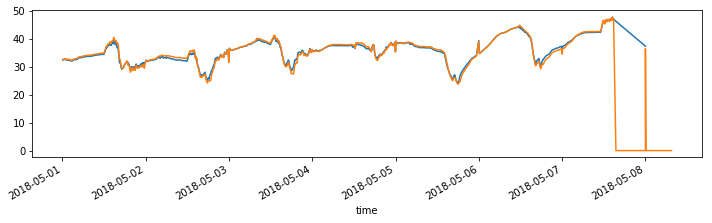

In [68]:
fig, ax = plt.subplots(figsize=(12,3))
for ds, df in dfs.items():
    try:
        df.AT.plot(ax=ax)
    except:
        pass

fig, ax = plt.subplots(figsize=(12,3))
for ds, df in dfs.items():
    try:
        df.BP.plot(ax=ax)
    except:
        pass

fig, ax = plt.subplots(figsize=(12,3))
for ds, df in dfs.items():
    try:
        df.RH.plot(ax=ax)
    except:
        pass

In [53]:
import metpy